In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

df = pd.read_csv('googleplaystore.csv')
df.dropna(inplace = True)

# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

#Cleaning no of installs classification
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]


#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

#Cleaning of genres
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

# for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category'])

#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))
    
    
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix



In [2]:
from sklearn.linear_model import LinearRegression 

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

In [3]:
X_train

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c
2020,20267,46000000.0,1000000,0,0.00,0,18
7098,56,38000000.0,5000,0,0.00,0,3
3821,15681,13000000.0,5000000,0,0.00,0,32
7817,2526,22000000.0,100000,0,0.00,0,17
6985,22,82000.0,1000,1,0.99,0,25
...,...,...,...,...,...,...,...
10809,376223,24000000.0,1000000,0,0.00,0,18
8895,7578,25000000.0,1000000,0,0.00,0,16
5284,322,6800000.0,50000,0,0.00,0,26
7403,16,3200000.0,1000,0,0.00,0,27


In [4]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [5]:


#Creation of results dataframe and addition of first entry
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

#adding results into results dataframe
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear - Dummy'),ignore_index = True)

In [6]:
X_d

,Reviews,Size,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159,19000000.0,10000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000000.0,500000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700000.0,5000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000000.0,50000000,0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800000.0,100000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,38,53000000.0,5000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,4,3600000.0,100,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,114,3600000.0,1000,0,0.0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_d

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

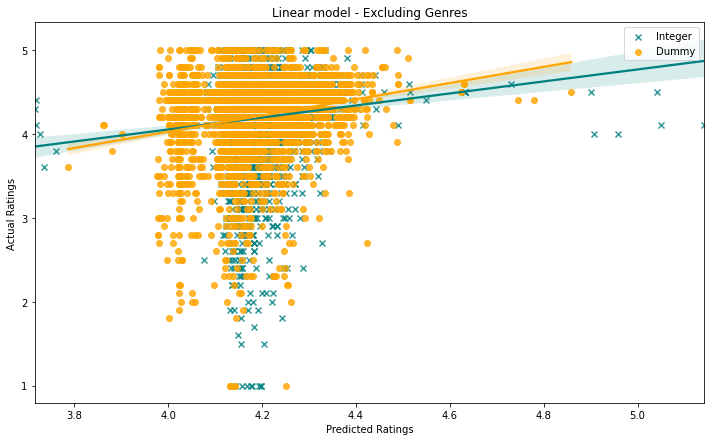

In [8]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [9]:
print ('Actual mean of population:' + str(y.mean()))
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Actual mean of population:4.191837606837612
Integer encoding(mean) :4.193464035001119
Dummy encoding(mean) :4.184027763690421
Integer encoding(std) :0.07244952582730901
Dummy encoding(std) :0.10086215991301083


In [10]:
#Including genre label

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results, name = 'Linear(inc Genre) - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear(inc Genre) - Dummy'),ignore_index = True)

In [11]:
X

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c,Genres_c
0,159,19000000.0,10000,0,0.0,0,0,0
1,967,14000000.0,500000,0,0.0,0,0,1
2,87510,8700000.0,5000000,0,0.0,0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0,0
4,967,2800000.0,100000,0,0.0,0,0,2
...,...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,18,12
10836,38,53000000.0,5000,0,0.0,0,18,12
10837,4,3600000.0,100,0,0.0,0,18,12
10839,114,3600000.0,1000,0,0.0,3,3,5


In [12]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [13]:
X_d

,Reviews,Size,Installs,Type,Price,Content Rating,Genres_c,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159,19000000.0,10000,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000000.0,500000,0,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700000.0,5000000,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800000.0,100000,0,0.0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,38,53000000.0,5000,0,0.0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,4,3600000.0,100,0,0.0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,114,3600000.0,1000,0,0.0,3,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


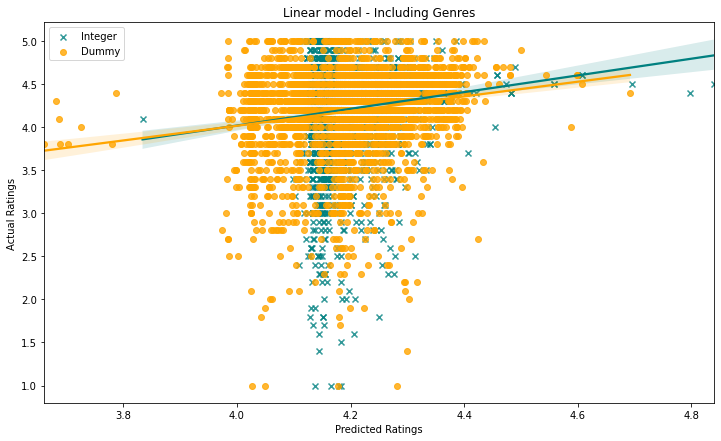

In [14]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [15]:
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Integer encoding(mean) :4.188146712587984
Dummy encoding(mean) :4.19658707918726
Integer encoding(std) :0.05957018434471802
Dummy encoding(std) :0.1045755290676017


In [16]:
#Excluding genres
from sklearn import svm
#Integer encoding

X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2, name = 'SVM - Integer'),ignore_index = True)

#dummy based


X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train_d,y_train_d)

Results2_d = model2.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2_d, name = 'SVM - Dummy'),ignore_index = True)

In [17]:
X

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c
0,159,19000000.0,10000,0,0.0,0,0
1,967,14000000.0,500000,0,0.0,0,0
2,87510,8700000.0,5000000,0,0.0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0
4,967,2800000.0,100000,0,0.0,0,0
...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,18
10836,38,53000000.0,5000,0,0.0,0,18
10837,4,3600000.0,100,0,0.0,0,18
10839,114,3600000.0,1000,0,0.0,3,3


In [18]:
X_d

,Reviews,Size,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159,19000000.0,10000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000000.0,500000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700000.0,5000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000000.0,50000000,0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800000.0,100000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,38,53000000.0,5000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,4,3600000.0,100,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,114,3600000.0,1000,0,0.0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


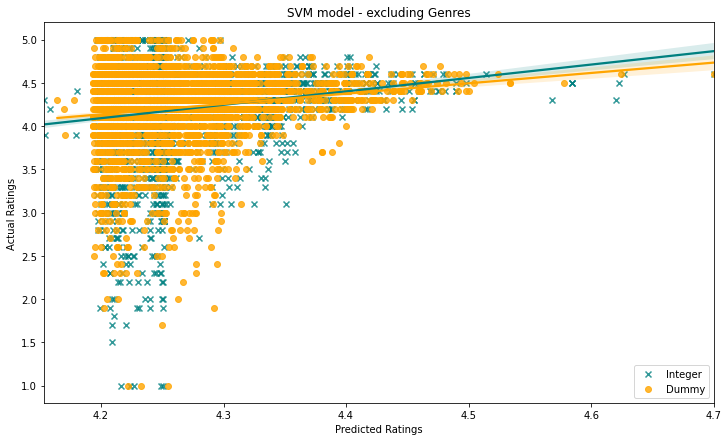

In [19]:
plt.figure(figsize=(12,7))
sns.regplot(Results2,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [20]:
print ('Integer encoding(mean) :' + str(Results2.mean()))
print ('Dummy encoding(mean) :'+ str(Results2_d.mean()))
print ('Integer encoding(std) :' + str(Results2.std()))
print ('Dummy encoding(std) :'+ str(Results2_d.std()))

Integer encoding(mean) :4.26562582679172
Dummy encoding(mean) :4.2667705486440415
Integer encoding(std) :0.05842626633947035
Dummy encoding(std) :0.060397764645159654


In [21]:
#Integer encoding, including Genres_c
model2a = svm.SVR()

X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2a.fit(X_train,y_train)

Results2a = model2a.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2a, name = 'SVM(inc Genres) - Integer'),ignore_index = True)

#dummy encoding, including Genres_c
model2a = svm.SVR()

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2a.fit(X_train_d,y_train_d)

Results2a_d = model2a.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2a_d, name = 'SVM(inc Genres) - Dummy'),ignore_index = True)

In [22]:
X

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c,Genres_c
0,159,19000000.0,10000,0,0.0,0,0,0
1,967,14000000.0,500000,0,0.0,0,0,1
2,87510,8700000.0,5000000,0,0.0,0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0,0
4,967,2800000.0,100000,0,0.0,0,0,2
...,...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,18,12
10836,38,53000000.0,5000,0,0.0,0,18,12
10837,4,3600000.0,100,0,0.0,0,18,12
10839,114,3600000.0,1000,0,0.0,3,3,5


In [23]:
X_d

,Reviews,Size,Installs,Type,Price,Content Rating,Genres_c,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159,19000000.0,10000,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000000.0,500000,0,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700000.0,5000000,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800000.0,100000,0,0.0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,38,53000000.0,5000,0,0.0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,4,3600000.0,100,0,0.0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,114,3600000.0,1000,0,0.0,3,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


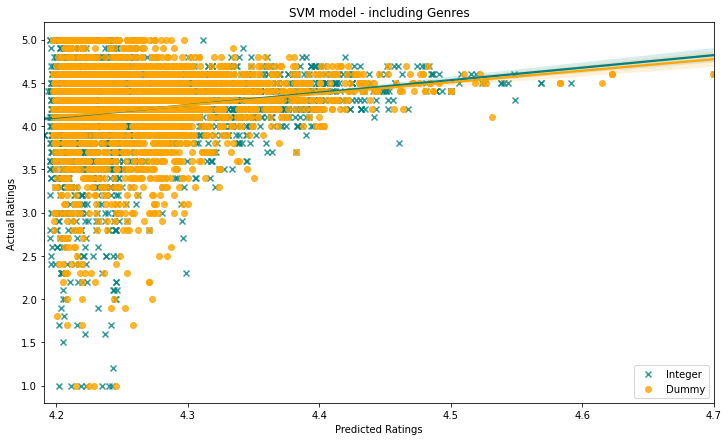

In [24]:
plt.figure(figsize=(12,7))
sns.regplot(Results2a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3, name = 'RFR - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model3_d = RandomForestRegressor()
model3_d.fit(X_train_d,y_train_d)
Results3_d = model3_d.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3_d, name = 'RFR - Dummy'),ignore_index = True)

In [32]:
X

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c
0,159,19000000.0,10000,0,0.0,0,0
1,967,14000000.0,500000,0,0.0,0,0
2,87510,8700000.0,5000000,0,0.0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0
4,967,2800000.0,100000,0,0.0,0,0
...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,18
10836,38,53000000.0,5000,0,0.0,0,18
10837,4,3600000.0,100,0,0.0,0,18
10839,114,3600000.0,1000,0,0.0,3,3


In [33]:
X_d

,Reviews,Size,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159,19000000.0,10000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000000.0,500000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700000.0,5000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000000.0,50000000,0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800000.0,100000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,7,2600000.0,500,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,38,53000000.0,5000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,4,3600000.0,100,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,114,3600000.0,1000,0,0.0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


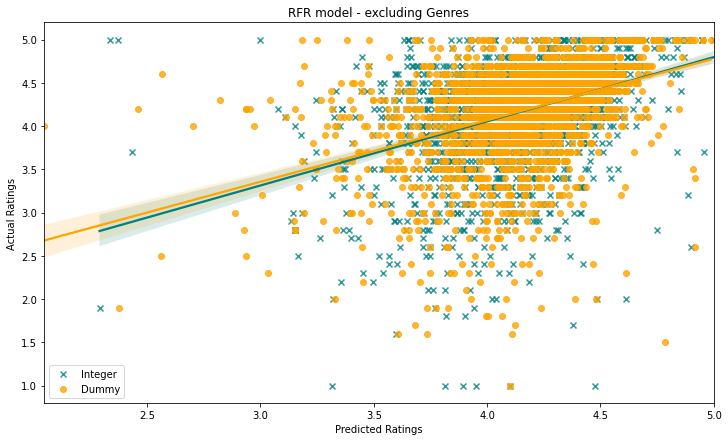

In [26]:
plt.figure(figsize=(12,7))
sns.regplot(Results3,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [27]:
print ('Integer encoding(mean) :' + str(Results3.mean()))
print ('Dummy encoding(mean) :'+ str(Results3_d.mean()))
print ('Integer encoding(std) :' + str(Results3.std()))
print ('Dummy encoding(std) :'+ str(Results3_d.std()))

Integer encoding(mean) :4.181378929249762
Dummy encoding(mean) :4.184368091168092
Integer encoding(std) :0.2820113043108975
Dummy encoding(std) :0.2949940877674862
